In [2]:
from qiskit import QuantumCircuit
import numpy as np

Due to the unitarity of quantum transformations, quantum computation is always reversible. Draw a 2-qubit quantum circuit that does the following:

1. Applies a Hadamard gate to the upper qubit.
2. Applies an X gate to the lower qubit.
3. Applies the inverse of the T gate to the lower qubit.
4. Applies a CX gate with the lower qubit being the control qubit and the upper qubit being the target qubit.
5. Applies the P gate with angle −π/3 to the upper qubit.
6. Reverses the operations in steps 1-5.

Assume that each qubit is initialized to the state |0⟩. After completing steps 1-6, your system should return to the state |00⟩

In [3]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.tdg(1)
qc.cx(1, 0)
qc.p(-np.pi / 3, 0)
print(qc.draw('text'))

     ┌───┐       ┌───┐┌─────────┐
q_0: ┤ H ├───────┤ X ├┤ P(-π/3) ├
     ├───┤┌─────┐└─┬─┘└─────────┘
q_1: ┤ X ├┤ Tdg ├──■─────────────
     └───┘└─────┘                


In [4]:
qc.barrier(label="U | U†")
qc.p(np.pi / 3, 0)
qc.cx(1, 0)
qc.t(1)
qc.x(1)
qc.h(0)
print(qc.draw('text'))

     ┌───┐       ┌───┐┌─────────┐ U | U† ┌────────┐┌───┐┌───┐     
q_0: ┤ H ├───────┤ X ├┤ P(-π/3) ├───░────┤ P(π/3) ├┤ X ├┤ H ├─────
     ├───┤┌─────┐└─┬─┘└─────────┘   ░    └────────┘└─┬─┘├───┤┌───┐
q_1: ┤ X ├┤ Tdg ├──■────────────────░────────────────■──┤ T ├┤ X ├
     └───┘└─────┘                   ░                   └───┘└───┘


In [5]:
from qiskit_aer import AerSimulator

statevector_simulator = AerSimulator(method='statevector')
sim_qc = qc.copy()
sim_qc.save_statevector()
job_statevector = statevector_simulator.run(sim_qc)
result_statevector = job_statevector.result()

In [6]:
output_state = result_statevector.get_statevector(sim_qc, decimals=3)
print(output_state)
if np.allclose(output_state.data, [1, 0, 0, 0]):
    print("Verification Successful: Final state is |00>")
else:
    print("Verification Failed: Final state is NOT |00>")

Statevector([1.-0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))
Verification Successful: Final state is |00>


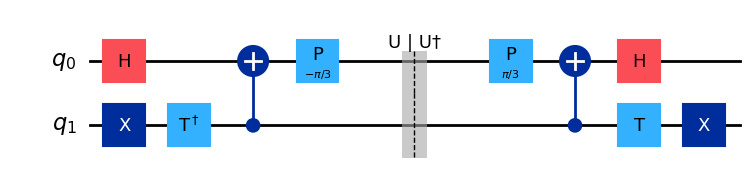

In [7]:
display(qc.draw('mpl')) 